<a href="https://colab.research.google.com/github/mte-tonmoy/Fruit-Images-for-Object-Detection/blob/main/Fruit_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset : [Fruit Images for Object Detection](https://www.kaggle.com/datasets/mbkinaci/fruit-images-for-object-detection)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.utils import to_categorical
from keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Dropout
from keras.models import Sequential
from sklearn.model_selection import train_test_split
np.random.seed(1)

In [ ]:
train_images = []       
train_labels = []
shape = (200,200)  
train_path = '/content/drive/MyDrive/Final Project Dmml/train_zip/train'
count=0
for filename in os.listdir('/content/drive/MyDrive/Final Project Dmml/train_zip/train'):

    print(count,' = ',filename)
    if filename.split('.')[1] == 'jpg':
        img = cv2.imread(os.path.join(train_path,filename))
        
    
        train_labels.append(filename.split('_')[0])
        
       
        img = cv2.resize(img,shape)
        
        train_images.append(img)
    count+=1


train_labels = pd.get_dummies(train_labels).values


train_images = np.array(train_images)


x_train,x_val,y_train,y_val = train_test_split(train_images,train_labels,random_state=1)

0  =  apple_42.jpg
1  =  apple_68.jpg
2  =  apple_48.jpg
3  =  apple_72.jpg
4  =  apple_61.jpg
5  =  apple_5.jpg
6  =  apple_2.jpg
7  =  apple_33.jpg
8  =  apple_36.jpg
9  =  apple_10.jpg
10  =  apple_73.jpg
11  =  apple_47.jpg
12  =  apple_37.jpg
13  =  apple_17.jpg
14  =  apple_16.jpg
15  =  apple_53.jpg
16  =  apple_66.jpg
17  =  apple_60.jpg
18  =  apple_12.jpg
19  =  apple_69.jpg
20  =  apple_59.jpg
21  =  apple_55.jpg
22  =  apple_3.jpg
23  =  apple_41.jpg
24  =  apple_9.jpg
25  =  apple_40.jpg
26  =  apple_27.jpg
27  =  apple_46.jpg
28  =  apple_4.jpg
29  =  apple_62.jpg
30  =  apple_52.jpg
31  =  apple_24.jpg
32  =  apple_31.jpg
33  =  apple_58.jpg
34  =  apple_51.jpg
35  =  apple_67.jpg
36  =  apple_26.jpg
37  =  apple_29.jpg
38  =  apple_11.jpg
39  =  apple_28.jpg
40  =  apple_76.jpg
41  =  apple_50.jpg
42  =  apple_23.jpg
43  =  apple_18.jpg
44  =  apple_57.jpg
45  =  apple_74.jpg
46  =  apple_6.jpg
47  =  apple_22.jpg
48  =  apple_49.jpg
49  =  apple_8.jpg
50  =  apple_15.j

In [ ]:
test_images = []
test_labels = []
shape = (200,200)
test_path = '/content/drive/MyDrive/Final Project Dmml/test_zip/test'

count=0
for filename in os.listdir('/content/drive/MyDrive/Final Project Dmml/test_zip/test'):

    print(count,' = ',filename)
    if filename.split('.')[1] == 'jpg':
        img = cv2.imread(os.path.join(test_path,filename))
        
        
        test_labels.append(filename.split('_')[0])
        
        
        img = cv2.resize(img,shape)
        
        test_images.append(img)
    count+=1

test_images = np.array(test_images)

0  =  apple_81.jpg
1  =  apple_89.jpg
2  =  apple_77.jpg
3  =  apple_83.jpg
4  =  apple_86.jpg
5  =  apple_90.jpg
6  =  apple_87.jpg
7  =  apple_80.jpg
8  =  apple_88.jpg
9  =  apple_84.jpg
10  =  apple_91.jpg
11  =  apple_93.jpg
12  =  apple_78.jpg
13  =  apple_95.jpg
14  =  apple_92.jpg
15  =  apple_85.jpg
16  =  apple_82.jpg
17  =  apple_94.jpg
18  =  apple_79.jpg
19  =  orange_80.jpg
20  =  orange_90.jpg
21  =  orange_95.jpg
22  =  orange_77.jpg
23  =  orange_79.jpg
24  =  orange_81.jpg
25  =  orange_86.jpg
26  =  orange_87.jpg
27  =  orange_91.jpg
28  =  orange_92.jpg
29  =  orange_93.jpg
30  =  orange_82.jpg
31  =  orange_94.jpg
32  =  orange_83.jpg
33  =  banana_84.jpg
34  =  banana_90.jpg
35  =  banana_79.jpg
36  =  banana_77.jpg
37  =  banana_80.jpg
38  =  banana_81.jpg
39  =  banana_82.jpg
40  =  banana_83.jpg
41  =  banana_85.jpg
42  =  banana_86.jpg
43  =  banana_87.jpg
44  =  banana_88.jpg
45  =  banana_91.jpg
46  =  banana_93.jpg
47  =  banana_92.jpg
48  =  banana_94.jpg


[1 0 0 0]


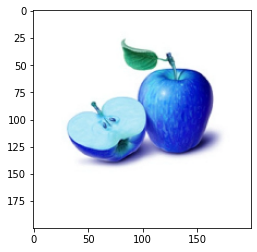

In [ ]:
print(train_labels[4])
plt.imshow(train_images[4])

[1 0 0 0]


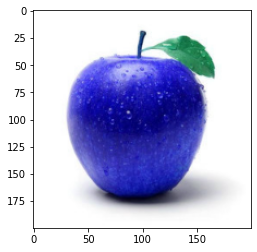

In [ ]:
print(train_labels[6])
plt.imshow(train_images[6])

In [ ]:
model= Sequential()
model.add(Conv2D(kernel_size=(3,3), filters=32, activation='tanh', input_shape=(200,200,3,)))
model.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))

model.add(Flatten())

model.add(Dense(20,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(4,activation = 'softmax'))
    
model.compile(
              loss='categorical_crossentropy', 
              metrics=['acc'],
              optimizer='adam'
             )

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 196, 196, 30)      8670      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 98, 98, 30)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 96, 96, 30)        8130      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 30)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 46, 46, 30)        8

In [ ]:
history = model.fit(x_train,y_train,epochs=50,batch_size=50,validation_data=(x_val,y_val))

Epoch 1/50
4/4 [==============================] - 26s 6s/step - loss: 2.5289 - acc: 0.3278 - val_loss: 1.3403 - val_acc: 0.6167
Epoch 2/50
4/4 [==============================] - 22s 6s/step - loss: 3.5299 - acc: 0.3444 - val_loss: 1.5698 - val_acc: 0.4667
Epoch 3/50
4/4 [==============================] - 23s 6s/step - loss: 1.5725 - acc: 0.3889 - val_loss: 1.2157 - val_acc: 0.5000
Epoch 4/50
4/4 [==============================] - 24s 6s/step - loss: 1.1305 - acc: 0.5444 - val_loss: 1.2241 - val_acc: 0.5500
Epoch 5/50
4/4 [==============================] - 25s 6s/step - loss: 1.2977 - acc: 0.5556 - val_loss: 1.1106 - val_acc: 0.5500
Epoch 6/50
4/4 [==============================] - 23s 6s/step - loss: 0.9076 - acc: 0.5833 - val_loss: 0.9504 - val_acc: 0.6333
Epoch 7/50
4/4 [==============================] - 23s 6s/step - loss: 0.8619 - acc: 0.6778 - val_loss: 1.1833 - val_acc: 0.5167
Epoch 8/50
4/4 [==============================] - 23s 6s/step - loss: 0.8823 - acc: 0.6222 - val_loss: 1

In [ ]:
model.save('path/to/location')

INFO:tensorflow:Assets written to: path/to/location/assets


In [ ]:
from tensorflow import keras
model = keras.models.load_model('path/to/location')

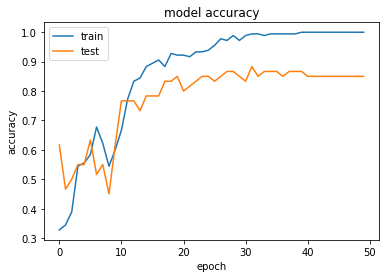

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

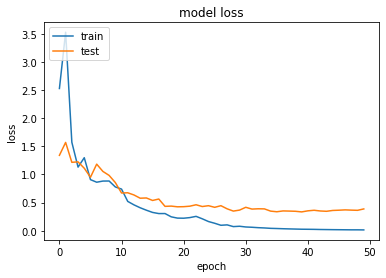

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
evaluate = model.evaluate(x_val,y_val)
print(evaluate)

2/2 [==============================] - 2s 827ms/step - loss: 0.3867 - acc: 0.8500
[0.3866676092147827, 0.8500000238418579]


In [26]:
checkImage = test_images[23:24]
checklabel = test_labels[23:24]

predict = model.predict(np.array(checkImage))

output = { 0:'apple',1:'banana',2:'mixed',3:'orange'}

print("Actual :- ",checklabel)
print("Predicted :- ",output[np.argmax(predict)])

Actual :-  ['orange']
Predicted :-  orange
